In [11]:
from modules import *

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [12]:
# connect to mysql db, read cb_offices table as dataframe, disconnect
conn = dbConnect()
offices = dbTableToDataFrame(conn, 'cb_offices')
ipos = dbTableToDataFrame(conn, 'cb_ipos')
conn.close()

In [13]:
offices.head()

,address1,address2,city,country_code,created_at,description,id,latitude,longitude,object_id,office_id,region,state_code,updated_at,zip_code
0,710 - 2nd Avenue,Suite 1100,Seattle,USA,None,,1,47.6031220000,-122.3332530000,c:1,1,Seattle,WA,None,98104
1,4900 Hopyard Rd,Suite 310,Pleasanton,USA,None,Headquarters,2,37.6929340000,-121.9049450000,c:3,3,SF Bay,CA,None,94588
2,135 Mississippi St,None,San Francisco,USA,None,None,3,37.7647260000,-122.3945230000,c:4,4,SF Bay,CA,None,94107
3,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,5,SF Bay,CA,None,94025
4,Suite 200,654 High Street,Palo Alto,ISR,None,,5,None,None,c:7,7,SF Bay,CA,None,94301


In [14]:
ipos.head()

,created_at,id,ipo_id,object_id,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at,valuation_amount,valuation_currency_code
0,2008-02-09 05:17:45,1,1,c:1654,1980-12-19,None,USD,None,None,NASDAQ:AAPL,2012-04-12 04:02:59,None,USD
1,2008-02-09 05:25:18,2,2,c:1242,1986-03-13,None,None,None,None,NASDAQ:MSFT,2010-12-11 12:39:46,None,USD
2,2008-02-09 05:40:32,3,3,c:342,1969-06-09,None,None,None,None,NYSE:DIS,2010-12-23 08:58:16,None,USD
3,2008-02-10 22:51:24,4,4,c:59,2004-08-25,None,None,None,None,NASDAQ:GOOG,2011-08-01 20:47:08,None,USD
4,2008-02-10 23:28:09,5,5,c:317,1997-05-01,None,None,None,None,NASDAQ:AMZN,2011-08-01 21:11:22,100000000000,USD


In [317]:
offices_ipos = pd.merge(offices, ipos, on='object_id')

In [318]:
offices_ipos.head()

,address1,address2,city,country_code,created_at_x,description,id_x,latitude,longitude,object_id,...,ipo_id,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at_y,valuation_amount,valuation_currency_code
0,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
1,None,None,Dublin,IRL,None,Europe HQ,6975,53.3441040000,-6.2674940000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
2,340 Madison Ave,None,New York,USA,None,New York,9084,40.7557162000,-73.9792469000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
3,1355 Market St.,None,San Francisco,USA,None,,10,37.7768052000,-122.4169244000,c:12,...,1310,2013-11-07,1820000000,USD,Twitter Prices IPO Above Estimates At $26 Per ...,http://techcrunch.com/2013/11/06/twitter-price...,NYSE:TWTR,2013-11-07 04:18:48,18100000000,USD
4,2145 Hamilton Avenue,None,San Jose,USA,None,Headquarters,16,37.2950050000,-121.9300350000,c:20,...,26,1998-10-02,None,USD,None,None,NASDAQ:EBAY,2012-04-12 04:24:15,None,USD


In [319]:
offices_ipos.shape

(1554, 27)

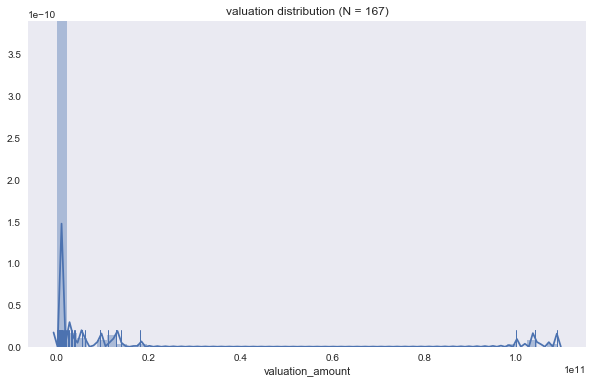

In [320]:
# plot valuation distribution; include number of companies considering
val = pd.to_numeric(offices_ipos[~offices_ipos.valuation_amount.isnull()].valuation_amount)
a=sns.distplot(val, rug=True);
a.set_title('valuation distribution (N = ' + str(len(val)) + ')');

In [321]:
val.describe()

count    1.670000e+02
mean     4.417525e+09
std      1.784308e+10
min      3.860000e+04
25%      1.093750e+08
50%      3.150000e+08
75%      1.000000e+09
max      1.089600e+11
Name: valuation_amount, dtype: float64

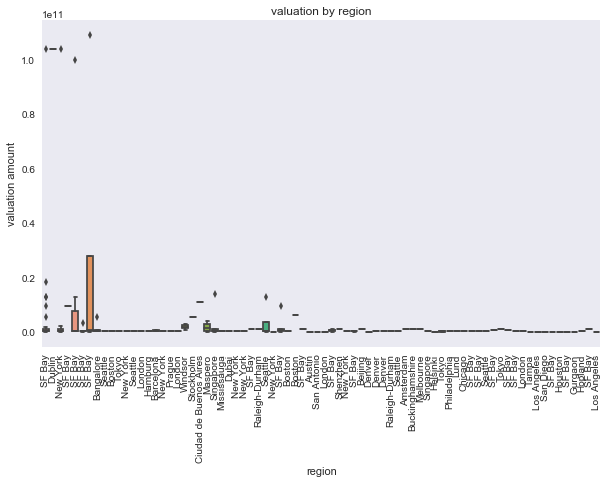

In [322]:
# look at valuation by region
region = offices_ipos[~offices_ipos.valuation_amount.isnull()].region
df_region_val = pd.concat([region, val], axis=1)
a=sns.boxplot(df_region_val.region, df_region_val.valuation_amount)
a.set_ylabel('valuation amount')
a.set_title('valuation by region')
a.set_xticklabels(labels=df_region_val.region, rotation=90);

In [323]:
# perform calculations on a per region basis
reg = df_region_val.groupby(['region'])

In [324]:
# max ipo valuation by region
m = reg.max()
m.sort_values(by='valuation_amount', ascending=False)[0:4]

,valuation_amount
region,
SF Bay,1.089600e+11
Dallas,1.040000e+11
Seattle,1.810000e+10
New York,1.400000e+10


In [325]:
# mean ipo valuation by region
ave = reg.mean()
ave.sort_values(by='valuation_amount', ascending=False)[0:4]

,valuation_amount
region,
Dallas,3.499158e+10
SF Bay,5.979781e+09
Chicago,5.440000e+09
San Diego,4.973923e+09


In [326]:
# sort regions by number of ipos (that had valutation amount) 
num = reg.count()
num.sort_values(by='valuation_amount', ascending=False)[0:4]

,valuation_amount
region,
SF Bay,42
Los Angeles,9
Seattle,8
New York,8


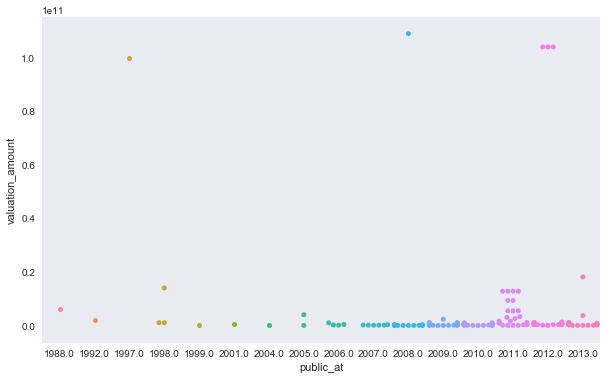

In [381]:
# plot number of ipos by year with different color for each region
dt = pd.to_datetime(offices_ipos[~offices_ipos.valuation_amount.isnull()].public_at)
sns.swarmplot(dt.dt.year, val);

In [385]:
df_region_dt = pd.concat([region, dt], axis=1)
time = df_region_dt.groupby([dt.dt.year])

In [391]:
num = time.count()
num.sort_values(by='public_at', ascending=False)

,region,public_at
public_at,,
2010.0,39,39
2013.0,26,26
2011.0,23,23
2012.0,20,20
2009.0,18,18
2008.0,13,13
2007.0,6,6
2006.0,4,4
1998.0,3,3
